In [41]:
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import zstandard as zstd

python(83161) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [9]:
dir="../data/"

sport_category_metadata = pd.read_parquet(dir+"filtered_sport_category_metadata.parquet",engine="fastparquet")
sport_category_without_discription_metadata = pd.read_parquet(dir+"filtered_sport_category_without_description_column_metadata.parquet",engine="fastparquet")


In [14]:
print("Data size is {}".format(sport_category_metadata.shape[0]))
sport_category_metadata.head()

Data size is 4354412


,categories,channel_id,crawl_date,description,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,Can I catch 100 lbs of catfish LIVE. Me and Ja...,35.0,JOeSxtcNdHQ,8620,1673.0,"catfishing,fishing,fishing challenge,catfish,c...",Catching 100 lbs of Catfish 🔴Live,2019-10-01 00:00:00,48737.0
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,,15.0,EPMLTw2zINw,355,1297.0,,big cat,2019-10-01 00:00:00,19999.0
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,Are you ready to enter the high fashion world ...,78.0,Y1_pK68iSYQ,603,3305.0,"Catfishing,how to catch catfish,fishing,classy...",Classy Catfishing - How to Catch Catfish the P...,2019-09-28 00:00:00,58518.0
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,Saltwater fishing out of Newquay Cornwall UK. ...,70.0,jF8TSo3ZfTc,1426,1889.0,"Fishing,Fishing uk,Angling,Sea angling,sea ang...",2 Day Saltwater Fishing Catch & Cook - UK Sea ...,2019-09-21 00:00:00,71998.0
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,My family spent 3 weeks touring England and fi...,73.0,Gp00dNaVouo,990,2699.0,"Fishing,catfish,wels catfish,how to catch catf...",How to Catch Wels Catfish - Fishing for Catfis...,2019-09-14 00:00:00,101924.0


In [15]:
print("Data size is {}".format(sport_category_without_discription_metadata.shape[0]))
sport_category_without_discription_metadata.head()

Data size is 4354412


,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:57.427254,35.0,JOeSxtcNdHQ,8620,1673.0,"catfishing,fishing,fishing challenge,catfish,c...",Catching 100 lbs of Catfish 🔴Live,2019-10-01 00:00:00,48737.0
1,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.108323,15.0,EPMLTw2zINw,355,1297.0,,big cat,2019-10-01 00:00:00,19999.0
2,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:58.773085,78.0,Y1_pK68iSYQ,603,3305.0,"Catfishing,how to catch catfish,fishing,classy...",Classy Catfishing - How to Catch Catfish the P...,2019-09-28 00:00:00,58518.0
3,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:39:59.465346,70.0,jF8TSo3ZfTc,1426,1889.0,"Fishing,Fishing uk,Angling,Sea angling,sea ang...",2 Day Saltwater Fishing Catch & Cook - UK Sea ...,2019-09-21 00:00:00,71998.0
4,Sports,UCzWn_gTaXyH5Idyo8Raf7_A,2019-11-03 16:40:00.188768,73.0,Gp00dNaVouo,990,2699.0,"Fishing,catfish,wels catfish,how to catch catf...",How to Catch Wels Catfish - Fishing for Catfis...,2019-09-14 00:00:00,101924.0


### Filter the data with tags
tag = "basketball" "NBA"

In [35]:
#Filter the data by key word such as "NBA" and "basketball"
filtered_str_nba=sport_category_without_discription_metadata[sport_category_without_discription_metadata["tags"].str.contains(r'\bnba\b', case=False, na=False)]
filtered_str_basketball=sport_category_without_discription_metadata[sport_category_without_discription_metadata["tags"].str.contains("basketball", case=False, na=False)]
filtered_str_both=filtered_str_basketball[filtered_str_basketball["tags"].str.contains(r'\bnba\b', case=False, na=False)]

In [37]:
print("The amount of data which contains \"nba\" in tags: {}".format(filtered_str_nba.shape[0]))
print("The amount of data which contains \"basketball\" in tags: {}".format(filtered_str_basketball.shape[0]))
print("The amount of data which contains \"basketball and nba\" in tags: {}".format(filtered_str_both.shape[0]))

The amount of data which contains "nba" in tags: 324679
The amount of data which contains "basketball" in tags: 425004
The amount of data which contains "basketball and nba" in tags: 236353


#### word cloud

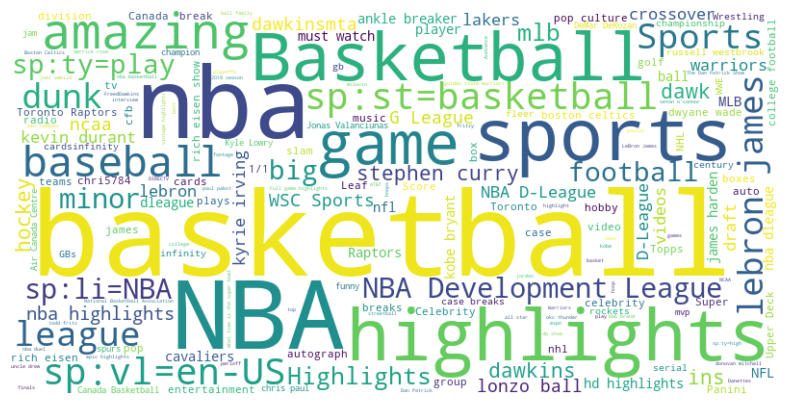

In [65]:
from collections import Counter
from wordcloud import WordCloud


# Extract tags and split them into individual tags

# Combine all tags into a single list
all_tags = [tag for sublist in filtered_str_both['tags'].str.split(',').tolist() for tag in sublist]

# Count the frequency of each tag
tag_counts = Counter(all_tags)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tag_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Analysis on upload year

In [49]:
def sort_time(data,category_name,title=None):
    date=pd.to_datetime(data[category_name])
    date_sort=date.dt.year.value_counts().sort_index()
    return date_sort


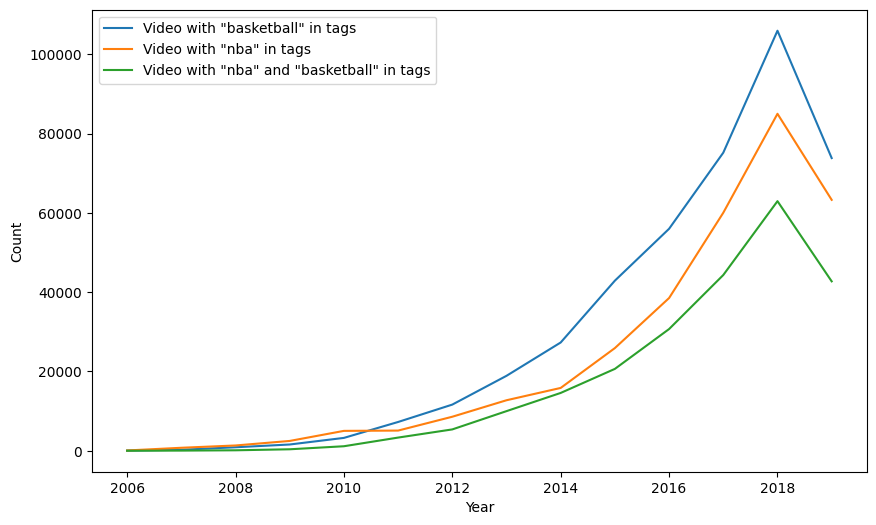

In [59]:
#upload date plot
plt.figure(figsize=(10, 6))
p1=sort_time(filtered_str_basketball,"upload_date")
p2=sort_time(filtered_str_nba,"upload_date")
p4=sort_time(filtered_str_both,"upload_date")

p1.plot(label="Video with \"basketball\" in tags")
p2.plot(label="Video with \"nba\" in tags")
p4.plot(label="Video with \"nba\" and \"basketball\" in tags")
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend()
plt.show()

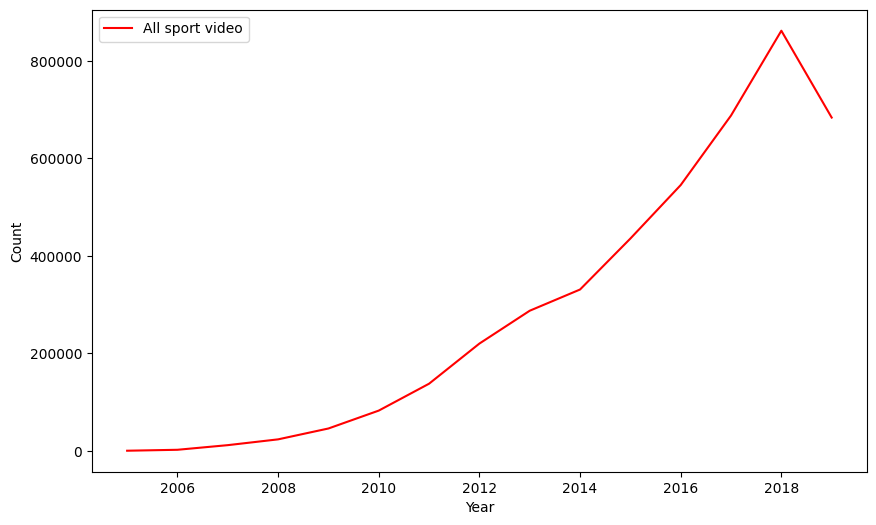

In [62]:
#what is plot of the upload date for all sport categorized video??
plt.figure(figsize=(10, 6))
p3=sort_time(sport_category_without_discription_metadata,"upload_date")
p3.plot(label="All sport video",color="red")
plt.xlabel('Year')
plt.ylabel('Count')

plt.legend()
plt.show()

### Analysis on upload month

### Create dataset for NBA season duration

In [73]:

data = {
    "Season": [f"{year}-{year+1}" for year in range(2006, 2020)],
    "Start_Date": [
        "2006-10-31", "2007-10-30", "2008-10-28", "2009-10-27", 
        "2010-10-26", "2011-12-25", "2012-10-30", "2013-10-29", 
        "2014-10-28", "2015-10-27", "2016-10-25", "2017-10-17", 
        "2018-10-16", "2019-10-22"
    ],
    "End_Date": [
        "2007-04-18", "2008-04-16", "2009-04-15", "2010-04-14", 
        "2011-04-13", "2012-04-26", "2013-04-17", "2014-04-16", 
        "2015-04-15", "2016-04-13", "2017-04-12", "2018-04-11", 
        "2019-04-10", "2020-03-11"
    ],
    "Playoff_Start": [
        "2007-04-21", "2008-04-19", "2009-04-18", "2010-04-17", 
        "2011-04-16", "2012-04-28", "2013-04-20", "2014-04-19", 
        "2015-04-18", "2016-04-16", "2017-04-15", "2018-04-14", 
        "2019-04-13", "2020-08-17"  
    ],
    "Finals_Start": [
        "2007-06-07", "2008-06-05", "2009-06-04", "2010-06-03", 
        "2011-05-31", "2012-06-12", "2013-06-06", "2014-06-05", 
        "2015-06-04", "2016-06-02", "2017-06-01", "2018-05-31", 
        "2019-05-30", "2020-09-30"  
    ],
    "Finals_End": [
        "2007-06-14", "2008-06-17", "2009-06-14", "2010-06-17", 
        "2011-06-12", "2012-06-21", "2013-06-20", "2014-06-15", 
        "2015-06-16", "2016-06-19", "2017-06-12", "2018-06-08", 
        "2019-06-13", "2020-10-11"  
    ]
}
NBA_season=pd.DataFrame(data)

In [74]:
NBA_season

,Season,Start_Date,End_Date,Playoff_Start,Finals_Start,Finals_End
0,2006-2007,2006-10-31,2007-04-18,2007-04-21,2007-06-07,2007-06-14
1,2007-2008,2007-10-30,2008-04-16,2008-04-19,2008-06-05,2008-06-17
2,2008-2009,2008-10-28,2009-04-15,2009-04-18,2009-06-04,2009-06-14
3,2009-2010,2009-10-27,2010-04-14,2010-04-17,2010-06-03,2010-06-17
4,2010-2011,2010-10-26,2011-04-13,2011-04-16,2011-05-31,2011-06-12
5,2011-2012,2011-12-25,2012-04-26,2012-04-28,2012-06-12,2012-06-21
6,2012-2013,2012-10-30,2013-04-17,2013-04-20,2013-06-06,2013-06-20
7,2013-2014,2013-10-29,2014-04-16,2014-04-19,2014-06-05,2014-06-15
8,2014-2015,2014-10-28,2015-04-15,2015-04-18,2015-06-04,2015-06-16
9,2015-2016,2015-10-27,2016-04-13,2016-04-16,2016-06-02,2016-06-19
